In [36]:
import pandas as pd
import numpy as np
import scanpy as sc
import pandas as pd
import seaborn as sns
from anndata import AnnData
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import umap
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score

# CODE FROM JUAN:
def neighbors(data, k=20):
    # for a given dataset, finds the k nearest neighbors for each point
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree',n_jobs =-1).fit(data)
    distances, indices = nbrs.kneighbors()
    return indices

def jaccard(A,B):
    # for two sets A and B, finds the Jaccard distance J between A and B
    A = set(A)
    B = set(B)
    union = list(A|B)
    intersection = list(A & B)
    J = ((len(union) - len(intersection))/(len(union)))
    return(J)

def get_AJD(A,B, num_neigh=20):
    NA= neighbors(A,k=num_neigh)
    NB = neighbors(B,k=num_neigh)
    #num_neigh=NA.shape[1]
    total_JD=0
    for i in range(NA.shape[0]):
        total_JD+= jaccard(NA[i,:],NB[i,:])
    total_JD/= NA.shape[0]
    return total_JD

# ALSO SEE https://github.com/shamusc/ajd?tab=readme-ov-file

def reduce_PCA(df, n_components):
    pca = PCA(n_components=n_components)
    columns = ['PC' + str(i) for i in range(1,n_components+1)]
    df_reduced = pca.fit_transform(df)
    df_reduced = pd.DataFrame(df_reduced, columns=columns)
    return df_reduced

def reduce_tSNE(df, n_components):
	tsne = TSNE(n_components=n_components, random_state = 10)
	columns = ['Dim' + str(i) for i in range(1,n_components+1)]
	df_reduced = tsne.fit_transform(df)
	df_reduced = pd.DataFrame(df_reduced, columns=columns)
	return df_reduced

def scree_plot(df):
    pca = PCA()
    pca.fit(df)
    plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='-')
    plt.xlabel('Number of Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title('Scree Plot')
    plt.show()
    print(pca.explained_variance_ratio_)

def load_data_expression(path):
    df = pd.read_csv(path, sep='\t')
    return df

def load_data_coords(path):
    df = pd.read_csv(path, sep='\t')
    return df

## Loading data

In [2]:
expression_df = load_data_expression(r'./Individual3_RAA_R1.newcount')
coords_df = load_data_coords(r'./Individual3_RAA_R1.idx')

In [3]:
expression_df

,ensemblid,gene,spot1,spot2,spot3,spot4,spot5,spot6,spot7,spot8,...,spot525,spot526,spot527,spot528,spot529,spot530,spot531,spot532,spot533,spot534
0,ENSG00000000419,DPM1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,ENSG00000000971,CFH,0.000000,1.973604,0.000000,0.986271,0.0,0.0,0.0,3.931867,...,0.0,0.986271,0.0,1.975388,1.971044,0.989367,0.986271,0.0,0.000000,0.0
2,ENSG00000001036,FUCA2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,ENSG00000001084,GCLC,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4,ENSG00000001461,NIPAL3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8547,ENSG00000278845,MRPL45,0.988834,0.986802,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
8548,ENSG00000279115,AC006386.2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
8549,ENSG00000279457,WASH9P,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
8550,ENSG00000279483,AC090498.1,0.988834,1.973604,1.973604,0.986271,0.0,0.0,0.0,0.982967,...,0.0,0.986271,0.0,0.000000,0.985522,0.989367,1.972541,0.0,0.991405,0.0


In [4]:
coords_df

,coordinate,spot1,spot2,spot3,spot4,spot5,spot6,spot7,spot8,spot9,...,spot525,spot526,spot527,spot528,spot529,spot530,spot531,spot532,spot533,spot534
0,x,6,6,6,6,6,6,6,7,7,...,31,32,32,32,32,32,32,32,32,32
1,y,7,8,9,10,11,12,13,5,6,...,15,4,5,9,10,11,12,13,14,15


In [90]:
processed_df = expression_df.drop(columns=['ensemblid', 'gene'], inplace=False)
processed_df = processed_df.T

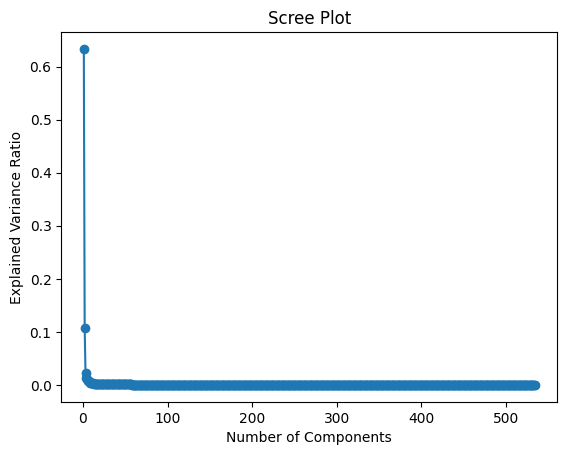

[6.33377132e-01 1.06937904e-01 2.21126014e-02 1.35019380e-02
 1.06364070e-02 7.63229340e-03 6.66185996e-03 4.54998784e-03
 3.64357703e-03 3.14614983e-03 2.95659647e-03 2.74185620e-03
 2.61448813e-03 2.43850222e-03 2.28463376e-03 2.18364279e-03
 2.05768206e-03 1.95731240e-03 1.93617892e-03 1.92206011e-03
 1.63265480e-03 1.58669354e-03 1.50887183e-03 1.48078347e-03
 1.42380817e-03 1.39231692e-03 1.30937620e-03 1.29224468e-03
 1.24503328e-03 1.23340917e-03 1.18813996e-03 1.15683984e-03
 1.12210136e-03 1.11060525e-03 1.08693646e-03 1.07959655e-03
 1.05491534e-03 1.02936852e-03 1.02271043e-03 1.00801295e-03
 9.89084418e-04 9.68101140e-04 9.57237320e-04 9.33842188e-04
 9.28399082e-04 9.26687751e-04 9.01401600e-04 8.95654927e-04
 8.81883905e-04 8.76188225e-04 8.58056777e-04 8.54225688e-04
 8.41237010e-04 8.37462193e-04 8.24943073e-04 8.08015173e-04
 8.04512327e-04 7.85945876e-04 7.79104622e-04 7.69659593e-04
 7.63781581e-04 7.58542691e-04 7.50611141e-04 7.40922072e-04
 7.34537804e-04 7.256408

In [6]:
scree_plot(processed_df)

## PCA Analysis

In [7]:
# PCA
# initially chose to reduce to 5 dimensions based on Scree plot
# update: to keep consistent between techniques, we choose to reduce to 2 dimensions
df_PCA = reduce_PCA(processed_df, 2)
df_PCA

,PC1,PC2
0,74.879692,-35.938822
1,79.358610,-20.553925
2,54.012481,-35.912672
3,110.320036,-52.378852
4,30.962225,-37.067352
...,...,...
529,18.110542,-29.719539
530,25.340521,-38.105961
531,2.649939,-43.308587
532,-9.071842,-43.771132


<Axes: xlabel='PC1', ylabel='PC2'>

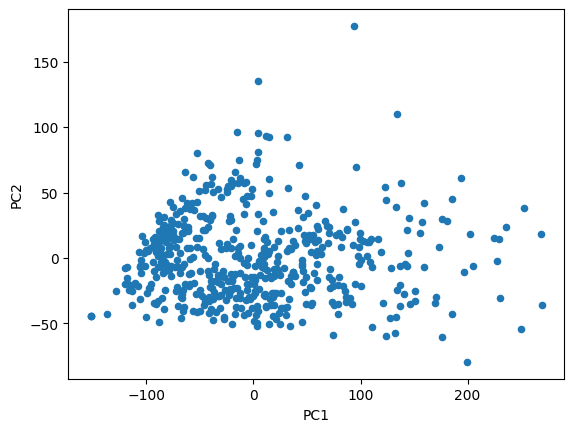

In [8]:
df_PCA.plot.scatter("PC1", "PC2")

## t-SNE Analysis

In [9]:
# t-SNE
df_tSNE = reduce_tSNE(processed_df, 2)
df_tSNE

,Dim1,Dim2
0,22.577278,-2.386423
1,22.772844,-1.389311
2,17.052528,-3.022690
3,26.723597,-4.238754
4,12.831623,-1.999643
...,...,...
529,10.434475,-3.028093
530,11.259299,-4.253544
531,6.704328,-3.471591
532,7.063404,-0.672685


<Axes: xlabel='Dim1', ylabel='Dim2'>

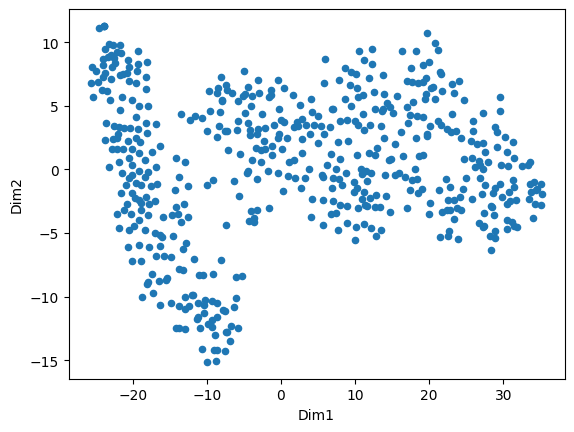

In [10]:
df_tSNE.plot.scatter("Dim1", "Dim2")

## U-MAP analysis


In [11]:
reducer = umap.UMAP(n_components=2, metric='euclidean')

In [12]:
embedding = reducer.fit_transform(processed_df)

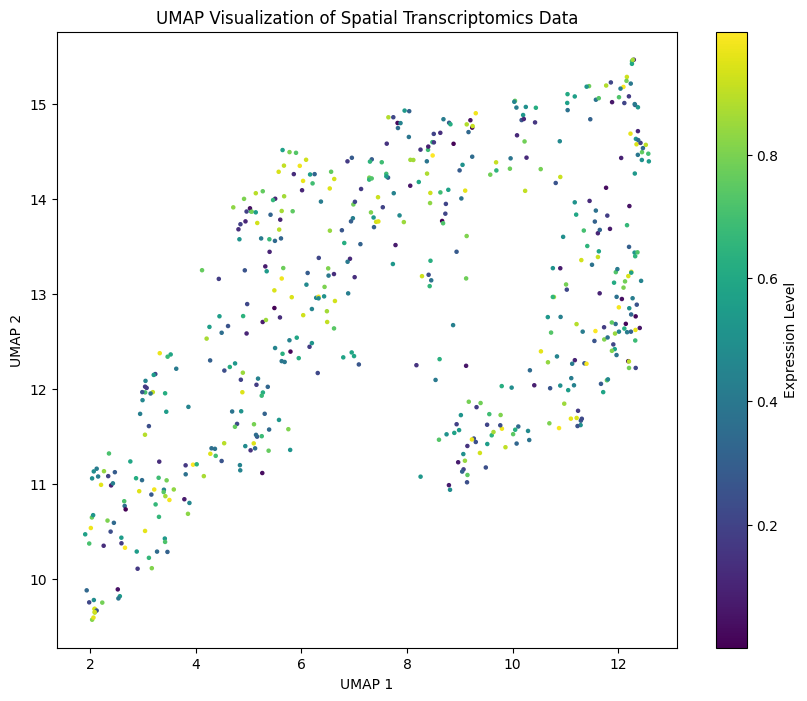

In [13]:
gene_expression_levels = np.random.rand(len(embedding))

# Visualize the UMAP embedding with gene expression levels as color
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], c=gene_expression_levels, cmap='viridis', s=5)
plt.colorbar(label='Expression Level')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('UMAP Visualization of Spatial Transcriptomics Data')
plt.show()

## AJD Calculations

### AJD For PCA

In [18]:
# pca knn + AJD analysis
pca_ajd_arr = []
for i in range(1, len(processed_df)):
  pca_neighbors = neighbors(df_PCA, i)
  raw_neighbors = neighbors(processed_df, i)
  pca_ajd_arr.append(get_AJD(pca_neighbors, raw_neighbors, i))

### AJD for tSNE

In [21]:
tSNE_ajd_arr = []
for i in range(1, len(processed_df)):
  tSNE_neighbors = neighbors(df_tSNE, i)
  raw_neighbors = neighbors(processed_df, i)
  tSNE_ajd_arr.append(get_AJD(tSNE_neighbors, raw_neighbors, i))

### AJD for UMAP

In [22]:
umap_ajd_arr = []
for i in range(1, len(processed_df)):
  umap_neighbors = neighbors(embedding, i)
  raw_neighbors = neighbors(processed_df, i)
  umap_ajd_arr.append(get_AJD(embedding, raw_neighbors, i))

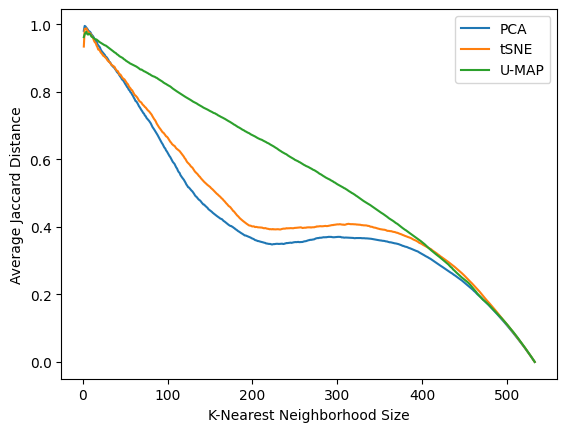

In [23]:
plt.plot(range(1, len(processed_df)), pca_ajd_arr, label="PCA")
plt.plot(range(1, len(processed_df)), tSNE_ajd_arr, label="tSNE")
plt.plot(range(1, len(processed_df)), umap_ajd_arr, label="U-MAP")
plt.legend()
plt.xlabel("K-Nearest Neighborhood Size")
plt.ylabel("Average Jaccard Distance")
plt.show()

## Clustering

In [24]:
#Include gene name information when clustering
processed_df_cluster = expression_df.drop(columns=['ensemblid'], inplace=False)
processed_df_cluster

,gene,spot1,spot2,spot3,spot4,spot5,spot6,spot7,spot8,spot9,...,spot525,spot526,spot527,spot528,spot529,spot530,spot531,spot532,spot533,spot534
0,DPM1,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
1,CFH,0.000000,1.973604,0.000000,0.986271,0.0,0.0,0.0,3.931867,0.0,...,0.0,0.986271,0.0,1.975388,1.971044,0.989367,0.986271,0.0,0.000000,0.0
2,FUCA2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
3,GCLC,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
4,NIPAL3,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8547,MRPL45,0.988834,0.986802,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
8548,AC006386.2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
8549,WASH9P,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
8550,AC090498.1,0.988834,1.973604,1.973604,0.986271,0.0,0.0,0.0,0.982967,0.0,...,0.0,0.986271,0.0,0.000000,0.985522,0.989367,1.972541,0.0,0.991405,0.0


In [25]:
#extract gene names
gene_names = processed_df_cluster.iloc[:, 0]

In [26]:
#Create a variable metadata df, and exclude the gene names from this df
var_metadata = processed_df_cluster.iloc[:, 1:].copy()
#set the gene names as the index of the variable metadata df
var_metadata.index = gene_names
#Remove gene names from the main data matrix
X = processed_df_cluster.iloc[:, 1:].values

In [43]:
#Create an AnnData object for which we can use scanpy
adata = anndata.AnnData(X.T)
#Assign gene related metadata to the var dimension of the AnnData object
adata.var = var_metadata

In [44]:
#Compute the neighborhood graph
sc.pp.neighbors(adata, use_rep = 'X')

## Fun visualization stuff

In [50]:
sc.tl.leiden(adata, key_added="clusters", directed=False, n_iterations=2)

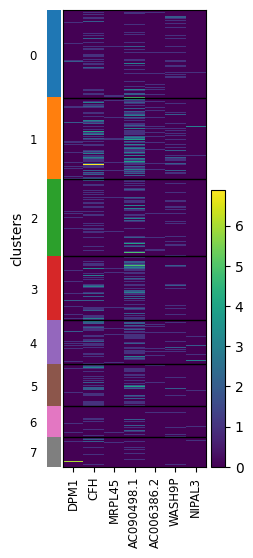

In [51]:
sc.pl.heatmap(adata, var_names = ['DPM1', 'CFH', 'MRPL45', 'AC090498.1', 'AC006386.2', 'WASH9P', 'NIPAL3'], groupby = 'clusters', dendrogram=False)

In [52]:
adata2 = sc.AnnData(X=processed_df.values)

In [53]:
adata2.write('Individual3_RAA_R1.h5ad')

In [54]:
adata_final = sc.read_h5ad('Individual3_RAA_R1.h5ad')

In [55]:
sc.pp.neighbors(adata_final, n_pcs=30, use_rep='X')

In [56]:
sc.tl.leiden(adata_final, key_added="leiden_res1", resolution=1.0)

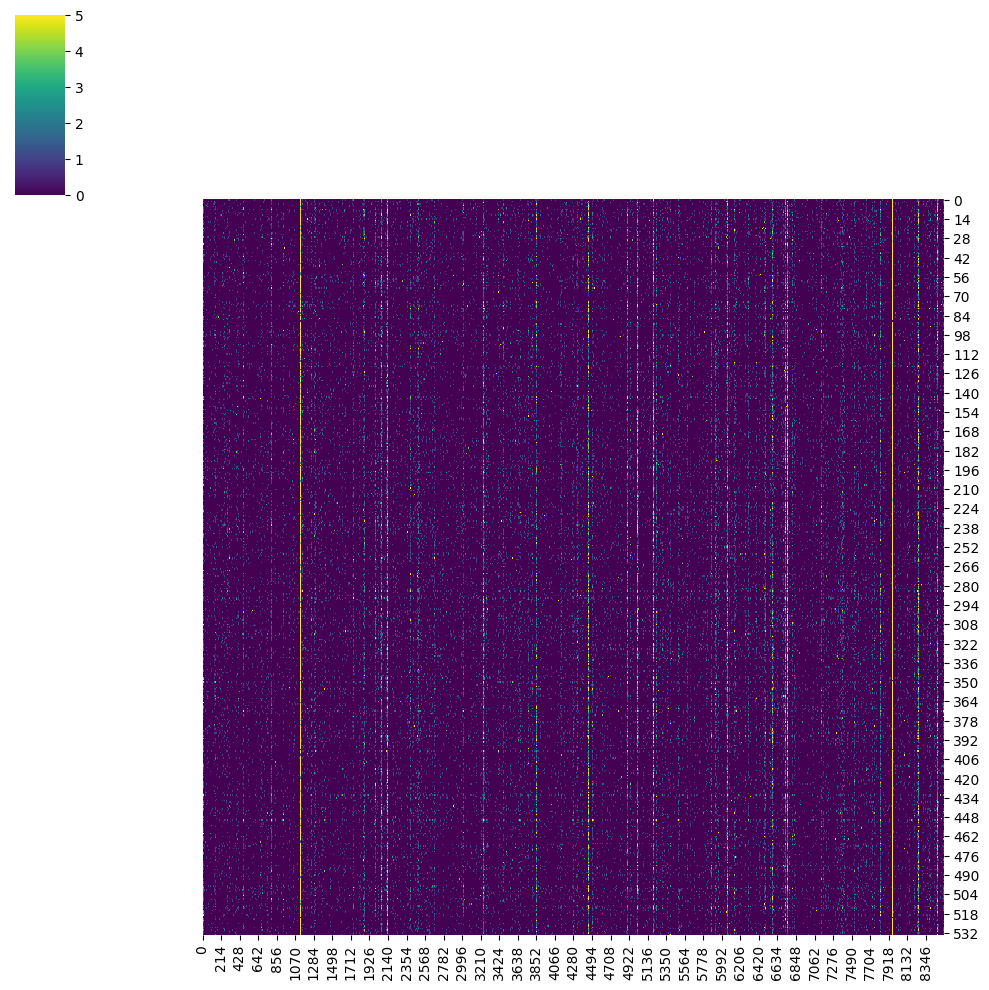

In [57]:
sc.pl.clustermap(adata_final, vmin=0, vmax=5, row_cluster=False, col_cluster=False, cmap='viridis')

## Raw Data Clustering

In [91]:
# proc_coords_df['SpotID'] = range(0,535)
# proc_coords_df.iloc[0,0] = 'x'
coords_df
proc_coords_df = coords_df.T
proc_coords_df.insert(0, 'SpotID', range(0,535))
proc_coords_df.rename(columns={proc_coords_df.columns[1]: 'x' }, inplace=True)
proc_coords_df.rename(columns={proc_coords_df.columns[2]: 'y' }, inplace=True)
proc_coords_df.rename(columns={proc_coords_df.columns[0]: 'SpotID'}, inplace=True)
proc_coords_df = proc_coords_df.iloc[1:]
proc_coords_df

,SpotID,x,y
spot1,1,6,7
spot2,2,6,8
spot3,3,6,9
spot4,4,6,10
spot5,5,6,11
...,...,...,...
spot530,530,32,11
spot531,531,32,12
spot532,532,32,13
spot533,533,32,14


In [97]:
processed_df = processed_df.rename(columns={processed_df.columns[0]: 'SpotID'})
processed_df['SpotID'] = range(1,535)
processed_df

,SpotID,1,2,3,4,5,6,7,8,9,...,8543,8544,8545,8546,8547,8548,8549,8550,8551,0
spot1,1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.988834,0.0,0.0,0.988834,0.0,1
spot2,2,1.973604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.986802,0.0,0.0,1.973604,0.0,2
spot3,3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.973604,0.0,3
spot4,4,0.986271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.986271,0.000000,0.0,0.0,0.986271,0.0,4
spot5,5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
spot530,530,0.989367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.989367,0.0,530
spot531,531,0.986271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.972541,0.0,531
spot532,532,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.975103,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,532
spot533,533,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.991405,0.0,533


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


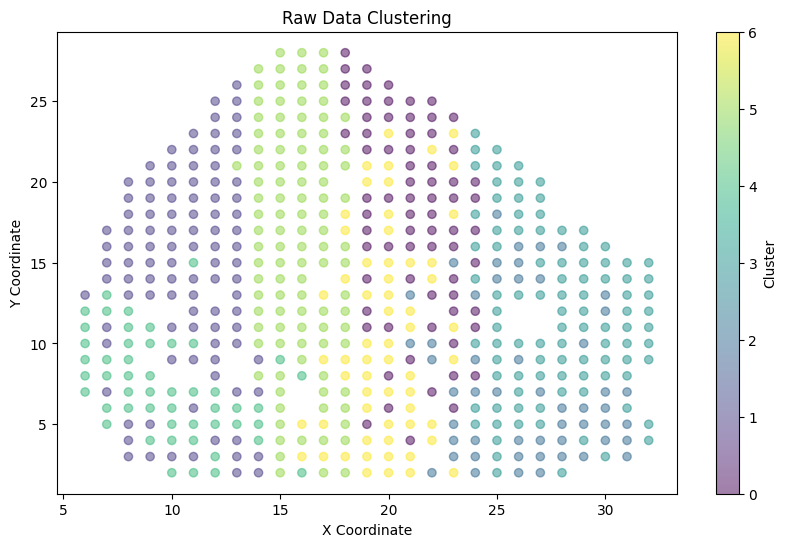

In [98]:
# Step 1: Merge dataframes
merged_df = pd.merge(processed_df, proc_coords_df, on='SpotID')

# Step 2: Clustering
# Assuming gene expression columns are X1, X2, ..., Xn
gene_expression_data = merged_df.iloc[:, 2:].values
kmeans = KMeans(n_clusters=7)  # Adjust number of clusters as needed
clusters = kmeans.fit_predict(gene_expression_data)

#Step 3: Visualize clusters
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['x'], merged_df['y'], c=clusters, cmap='viridis', alpha=0.5)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Raw Data Clustering')
plt.colorbar(label='Cluster')
plt.show()

## PCA Clustering

In [99]:
df_PCA.insert(0, 'SpotID', range(1,535))

In [100]:
merged_PCA_df = pd.merge(df_PCA, proc_coords_df)
gene_expression_data_PCA = merged_PCA_df.iloc[:, 2:].values
kmeans_PCA = KMeans(n_clusters=7)  # Adjust number of clusters as needed
clusters_PCA = kmeans.fit_predict(gene_expression_data_PCA)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


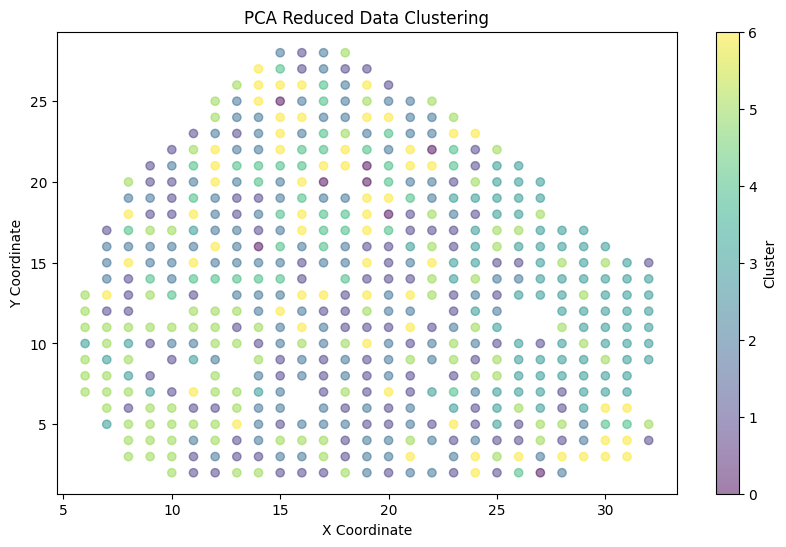

In [101]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_PCA_df['x'], merged_PCA_df['y'], c=clusters_PCA, cmap='viridis', alpha=0.5)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('PCA Reduced Data Clustering')
plt.colorbar(label='Cluster')
plt.show()

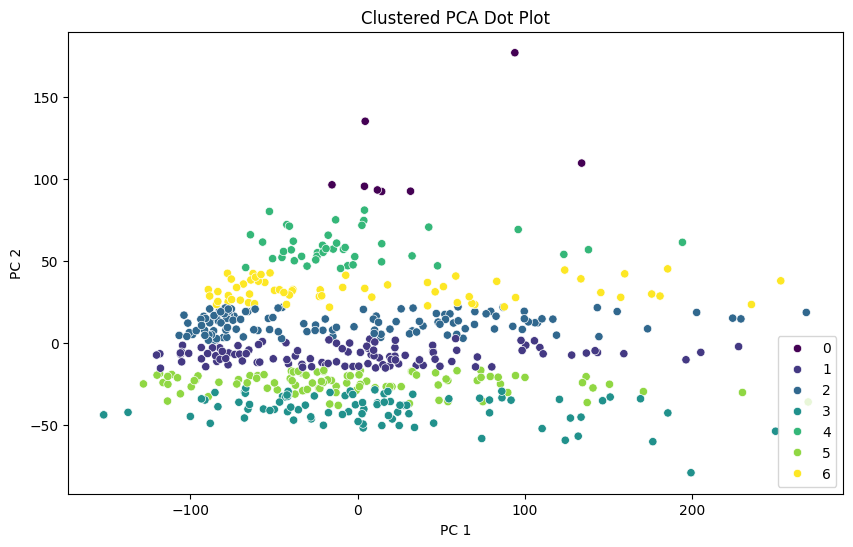

In [102]:
clusters_PCA_df = pd.DataFrame(clusters_PCA)
clusters_PCA_df.rename(columns={clusters_PCA_df.columns[0]:'ClusterID'}, inplace = True)
merged_clusterPCA_df = pd.concat([df_PCA, clusters_PCA_df], axis=1)
merged_clusterPCA_df
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_clusterPCA_df, x='PC1', y='PC2',hue='ClusterID', palette='viridis', legend='full')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Clustered PCA Dot Plot')
plt.legend(loc='lower right')
plt.show()

## tSNE Clustering

In [111]:
df_tSNE
# df_tSNE.insert(0, 'SpotID', range(1,535))

,SpotID,Dim1,Dim2
0,1,22.577278,-2.386423
1,2,22.772844,-1.389311
2,3,17.052528,-3.022690
3,4,26.723597,-4.238754
4,5,12.831623,-1.999643
...,...,...,...
529,530,10.434475,-3.028093
530,531,11.259299,-4.253544
531,532,6.704328,-3.471591
532,533,7.063404,-0.672685


/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


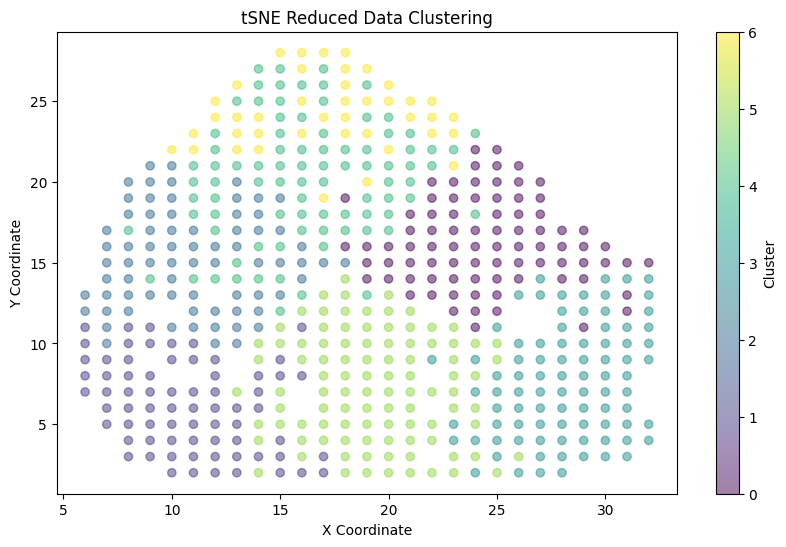

In [112]:
merged_tSNE_df = pd.merge(df_tSNE, proc_coords_df)
gene_expression_data_tSNE = merged_tSNE_df.iloc[:, 2:].values
kmeans_tSNE = KMeans(n_clusters=7)  # Adjust number of clusters as needed
clusters_tSNE = kmeans.fit_predict(gene_expression_data_tSNE)

plt.figure(figsize=(10, 6))
plt.scatter(merged_tSNE_df['x'], merged_tSNE_df['y'], c=clusters_tSNE, cmap='viridis', alpha=0.5)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('tSNE Reduced Data Clustering')
plt.colorbar(label='Cluster')
plt.show()

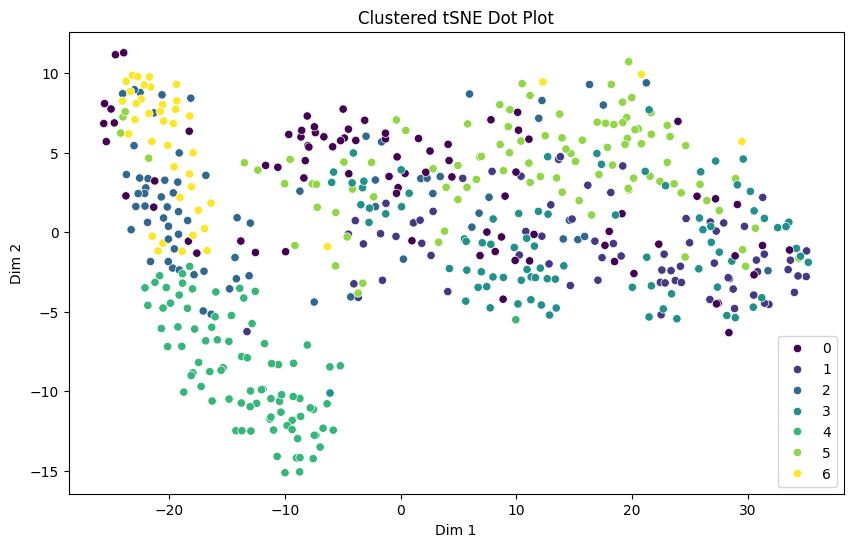

In [113]:
clusters_tSNE_df = pd.DataFrame(clusters_tSNE)
clusters_tSNE_df.rename(columns={clusters_tSNE_df.columns[0]:'ClusterID'}, inplace = True)
merged_clustertSNE_df = pd.concat([df_tSNE, clusters_tSNE_df], axis=1)
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_clustertSNE_df, x='Dim1', y='Dim2',hue='ClusterID', palette='viridis', legend='full')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.title('Clustered tSNE Dot Plot')
plt.legend(loc='lower right')
plt.show()

In [115]:
merged_clustertSNE_df

,SpotID,Dim1,Dim2,ClusterID
0,1,22.577278,-2.386423,1
1,2,22.772844,-1.389311,1
2,3,17.052528,-3.022690,1
3,4,26.723597,-4.238754,1
4,5,12.831623,-1.999643,1
...,...,...,...,...
529,530,10.434475,-3.028093,3
530,531,11.259299,-4.253544,3
531,532,6.704328,-3.471591,3
532,533,7.063404,-0.672685,3


## UMAP Clustering

In [116]:
df_UMAP = pd.DataFrame(embedding)
df_UMAP.insert(0, 'SpotID', range(1,535))
df_UMAP.rename(columns={df_UMAP.columns[1]: 'UMAP1'}, inplace=True)
df_UMAP.rename(columns={df_UMAP.columns[2]: 'UMAP2'}, inplace=True)

/usr/local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


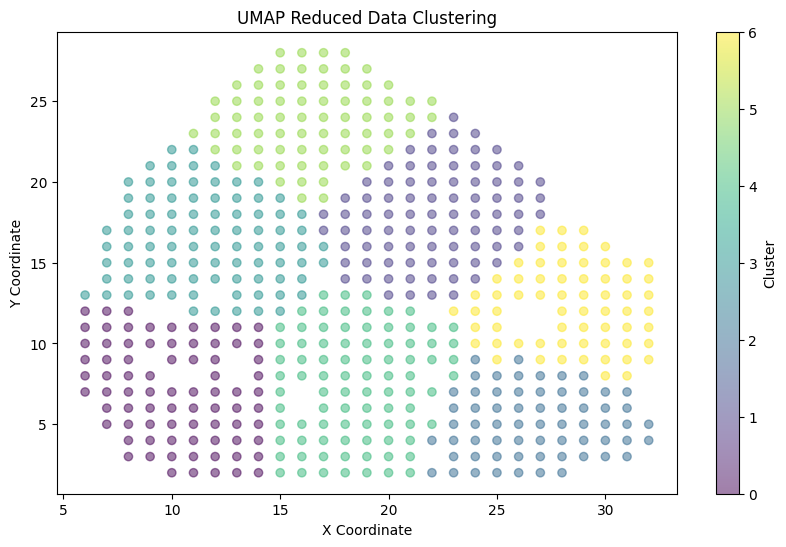

In [117]:
merged_UMAP_df = pd.merge(df_UMAP, proc_coords_df)
gene_expression_data_UMAP = merged_UMAP_df.iloc[:, 2:].values
kmeans_UMAP = KMeans(n_clusters=7)  # Adjust number of clusters as needed
clusters_UMAP = kmeans.fit_predict(gene_expression_data_UMAP)

plt.figure(figsize=(10, 6))
plt.scatter(merged_UMAP_df['x'], merged_UMAP_df['y'], c=clusters_UMAP, cmap='viridis', alpha=0.5)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('UMAP Reduced Data Clustering')
plt.colorbar(label='Cluster')
plt.show()

In [118]:
clusters_UMAP_df = pd.DataFrame(clusters_UMAP)
clusters_UMAP_df.rename(columns= {clusters_UMAP_df.columns[0]:'ClusterID'}, inplace = True)
merged_clusterUMAP_df = pd.concat([df_UMAP, clusters_UMAP_df], axis=1)

In [119]:
merged_clusterUMAP_df

,SpotID,UMAP1,UMAP2,ClusterID
0,1,3.189575,11.966609,0
1,2,3.444193,11.760583,0
2,3,4.438633,13.158394,0
3,4,2.359453,11.321407,0
4,5,4.848295,13.733508,0
...,...,...,...,...
529,530,5.137782,13.858746,6
530,531,5.138589,14.059902,6
531,532,5.777013,14.492415,6
532,533,6.252088,14.260705,6


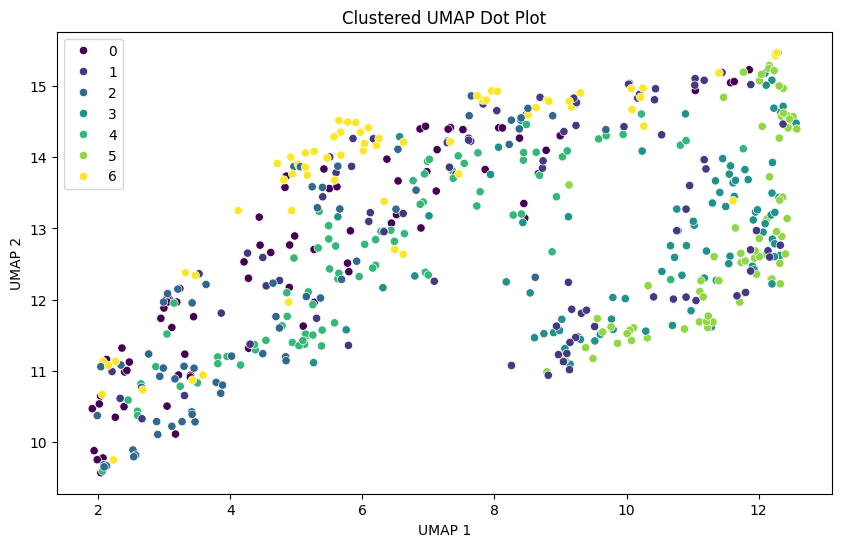

In [120]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=merged_clusterUMAP_df, x='UMAP1', y='UMAP2',hue='ClusterID', palette='viridis', legend='full')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.title('Clustered UMAP Dot Plot')
plt.legend(loc='upper left')
plt.show()

## ARI Calculations

In [121]:
#Convert the list of Cluster IDs for each data type into a list
clusters_raw_df = pd.DataFrame(clusters)
clusters_raw_df.rename(columns={clusters_raw_df.columns[0]:'ClusterID'}, inplace = True)
PCA_cluster_list = merged_clusterPCA_df['ClusterID'].values.flatten()
UMAP_cluster_list =merged_clusterUMAP_df['ClusterID'].tolist()
tSNE_cluster_list = merged_clustertSNE_df['ClusterID'].tolist()
raw_cluster_list = clusters_raw_df['ClusterID'].values.flatten()

### PCA vs. Raw

In [122]:
adjusted_rand_score(PCA_cluster_list, raw_cluster_list)

0.0938004531387058

### tSNE vs Raw

In [123]:
adjusted_rand_score(tSNE_cluster_list, raw_cluster_list)

0.26171361551030947

### UMAP vs Raw

In [124]:
adjusted_rand_score(UMAP_cluster_list, raw_cluster_list)

0.320837847142456